<a href="https://colab.research.google.com/github/odu-cs625-datavis/public-fall23-mcw/blob/main/EDA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis in Python

This is a companion notebook for [Chapter 7, Exploratory Data Analysis](https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html) from [Python for Data Science](https://byuidatascience.github.io/python4ds/), which itself is a Python port of Grolemund and Wickham's [R for Data Science](https://r4ds.had.co.nz/index.html) book (updated [2nd edition](https://r4ds.hadley.nz/)). *The section headings in this notebook will be numbered to correspond to the sections in Python for Data Science.*

Python for Data Science uses [Altair](https://altair-viz.github.io/index.html), which is a Python library built on top of [Vega-Lite](https://vega.github.io/vega-lite/), so the syntax may look familiar.  The code in this notebook will be based on [Seaborn Objects](https://seaborn.pydata.org/tutorial/objects_interface.html), to be consistent with our class materials.

# 7.1 Introduction
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#introduction-3

## 7.1.1 Prerequisites
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#prerequisites-3

In [75]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

Load the diamonds dataset

In [2]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/diamonds/diamonds.csv"
diamonds = pd.read_csv(url)

For each categorial attribute, use the Pandas [`Categorical()`](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html) function to turn any value not explicitly listed into `np.nan`.

In [3]:
diamonds['cut'] = pd.Categorical(diamonds.cut,
  ordered = True,
  categories =  ["Fair", "Good", "Very Good", "Premium", "Ideal" ])

diamonds['color'] = pd.Categorical(diamonds.color,
  ordered = True,
  categories =  ["D", "E", "F", "G", "H", "I", "J"])

diamonds['clarity'] = pd.Categorical(diamonds.clarity,
  ordered = True,
  categories =  ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

# 7.3 Variation
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#variation

## 7.3.1 Visualizing distributions
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#visualising-distributions

We want to view the number of observations of each type of diamond cut. First, we group the data by the `cut` attribute (`groupby()`) and then we aggregate and count the data in each group.

`count = ('cut', 'size')` is an example of using a [named aggregation](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.NamedAgg.html) shortcut. The first parameter indicates the attribute to use (`cut`) and the second parameter indicates the aggregation function (`size`) to use.  This could have also been written as `count = pd.NamedAgg(column="cut", aggfunc="size")`.

In [4]:
chart_dat = (diamonds
              .groupby('cut')
              .agg(count = ('cut', 'size'))
              .reset_index())

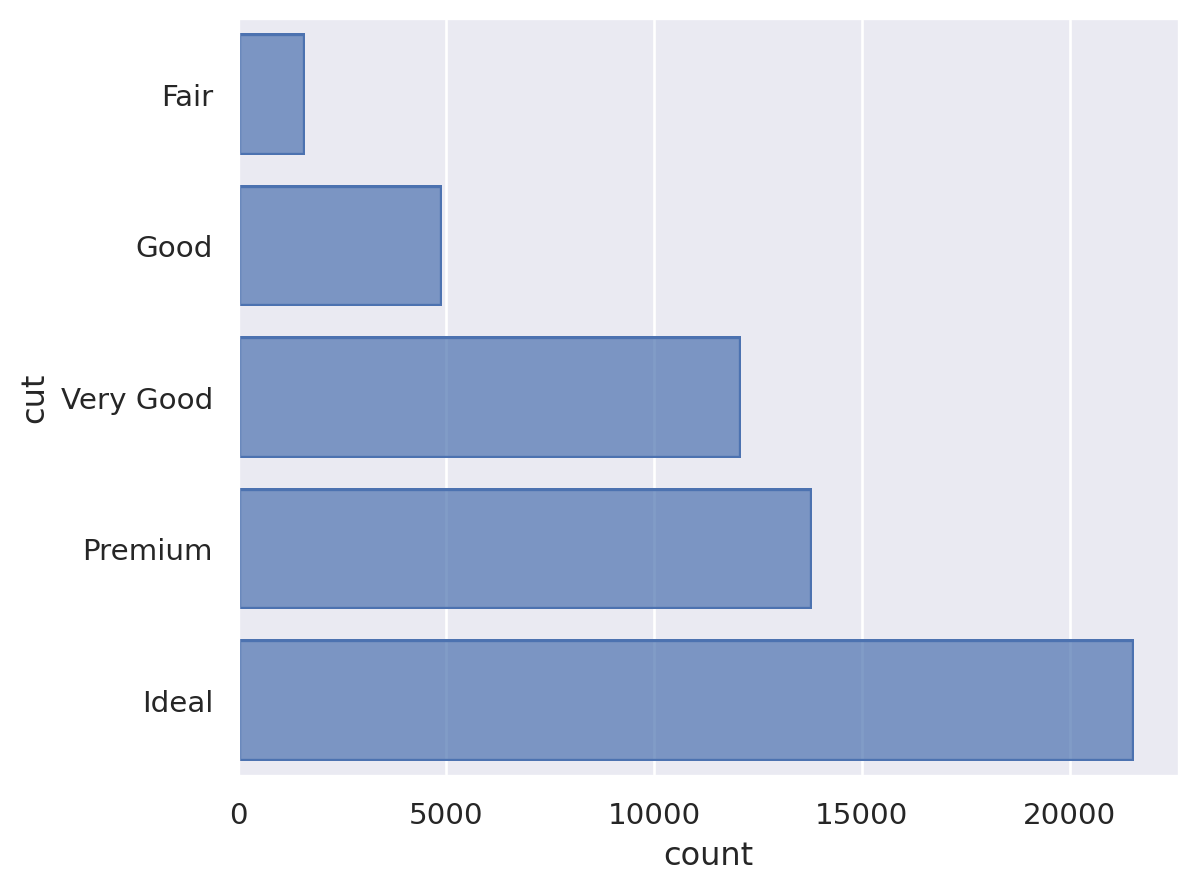

In [5]:
(so.Plot(data=chart_dat,
         x='count', y='cut')
  .add(so.Bar())
)

We'll use a histogram ([`Hist()`](https://seaborn.pydata.org/generated/seaborn.objects.Hist.html)) in Seaborn Objects to examine the distribution of one of the quantitative attributes.

To plot a histogram, you have to add `so.Hist()` to the `so.Bars()` mark. Note that [`so.Bars()`](https://seaborn.pydata.org/generated/seaborn.objects.Bars.html) is recommended over `so.Bar()` when you're doing a histogram.

Adding the `binrange` parameter forces the first bin to start at a certain spot, rather than starting the first bin at the min value present. To get the chart to match the Altair one, the first bin needed to start before 0. The second item in the tuple is the maximum, so it should be at least a bin size larger than the max value present.

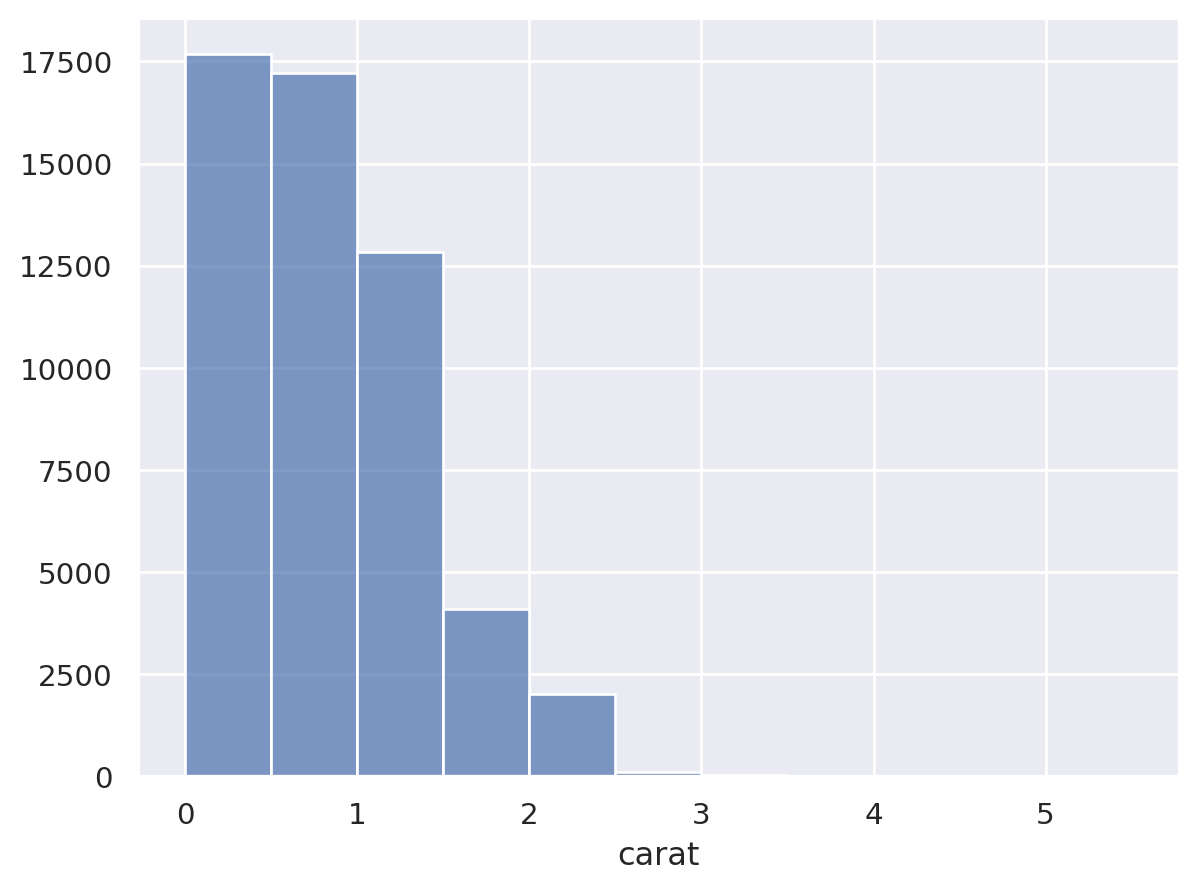

In [6]:
(so.Plot(diamonds, "carat")
  .add(so.Bars(), so.Hist(binwidth=0.5, binrange=(-0.5, 5.5)))
)

In [7]:
smaller = diamonds.query('carat < 3')

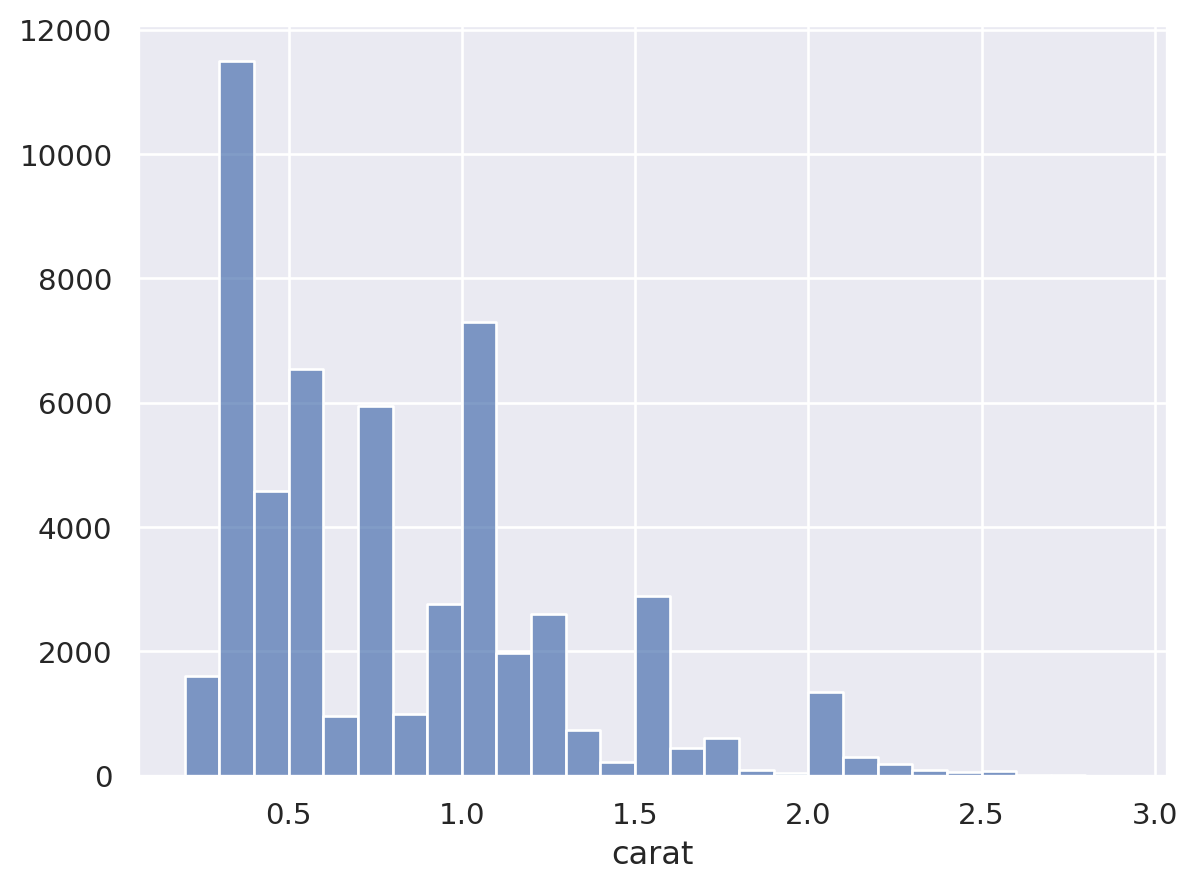

In [8]:
(so.Plot(smaller, "carat")
  .add(so.Bars(), so.Hist(binwidth=0.1, binrange=(-0.9, 3)))
)

We can use faceting ([`Plot.facet()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.facet.html)) to see multiple histograms at once.  The `wrap` parameter specifies how many charts to include in the same row.

In [9]:
p = so.Plot(smaller, "carat")
p = p.facet("cut", wrap=2)

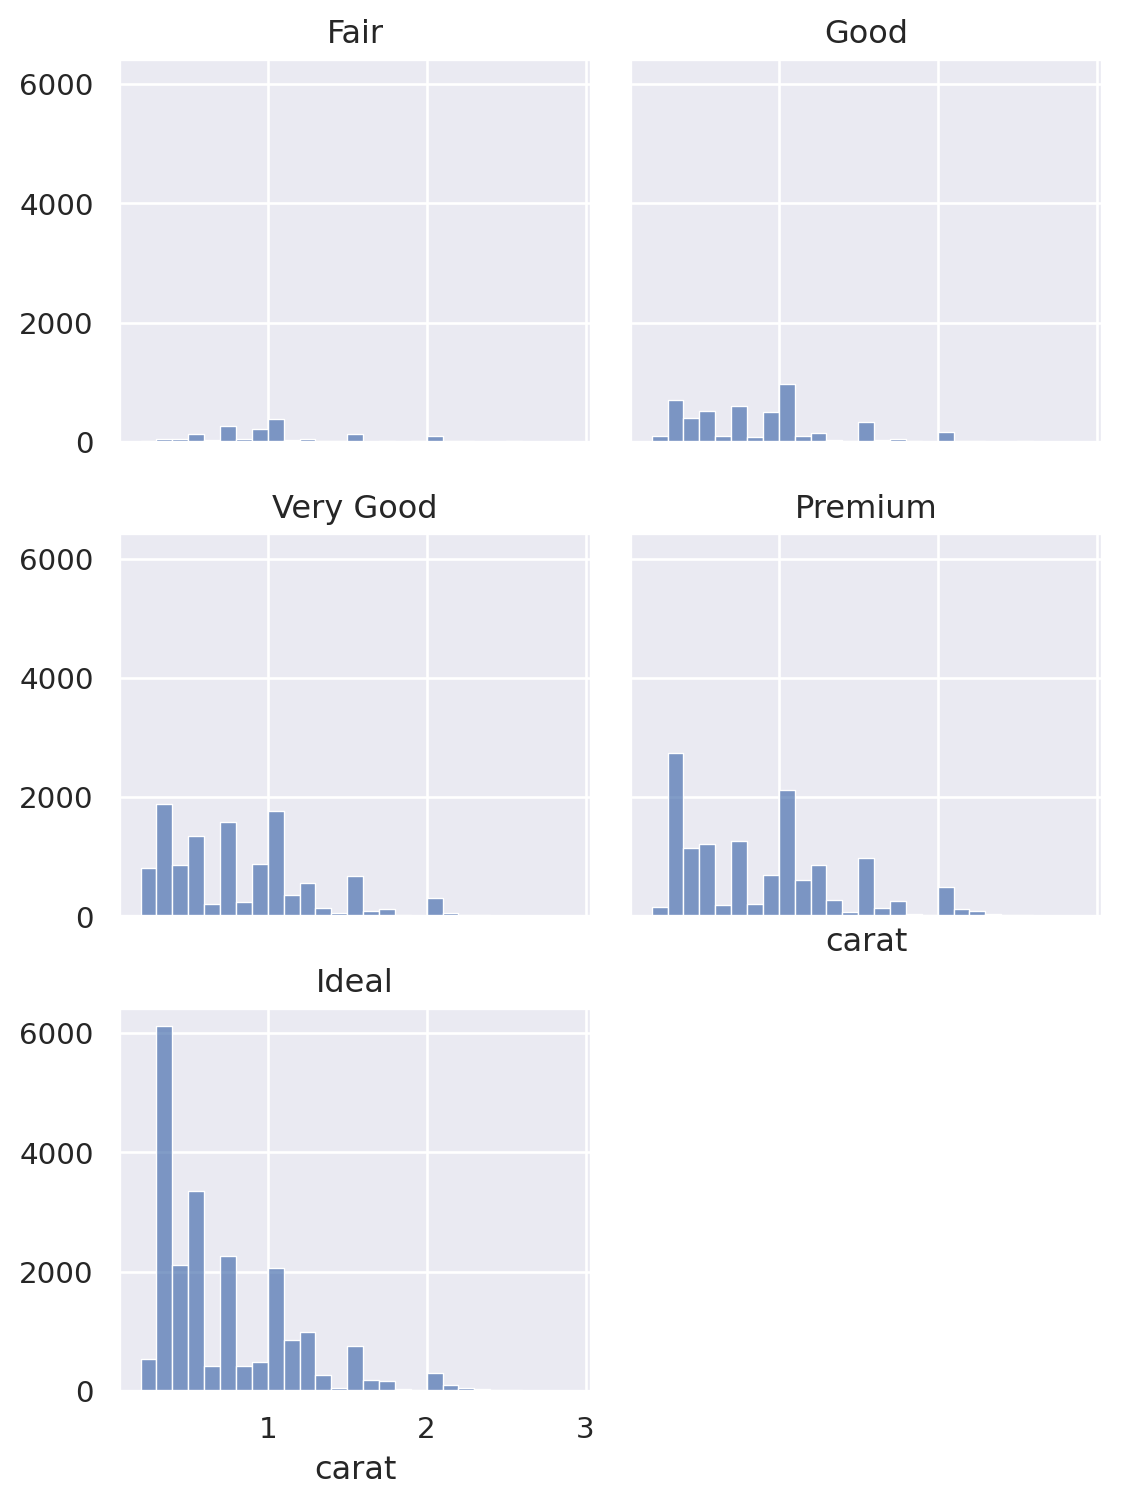

In [10]:
(
    p.add(so.Bars(), so.Hist(binwidth=0.1, binrange=(-0.9, 3)))
    .layout(size=(6,8))
)

## 7.3.2 Typical values
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#typical-values

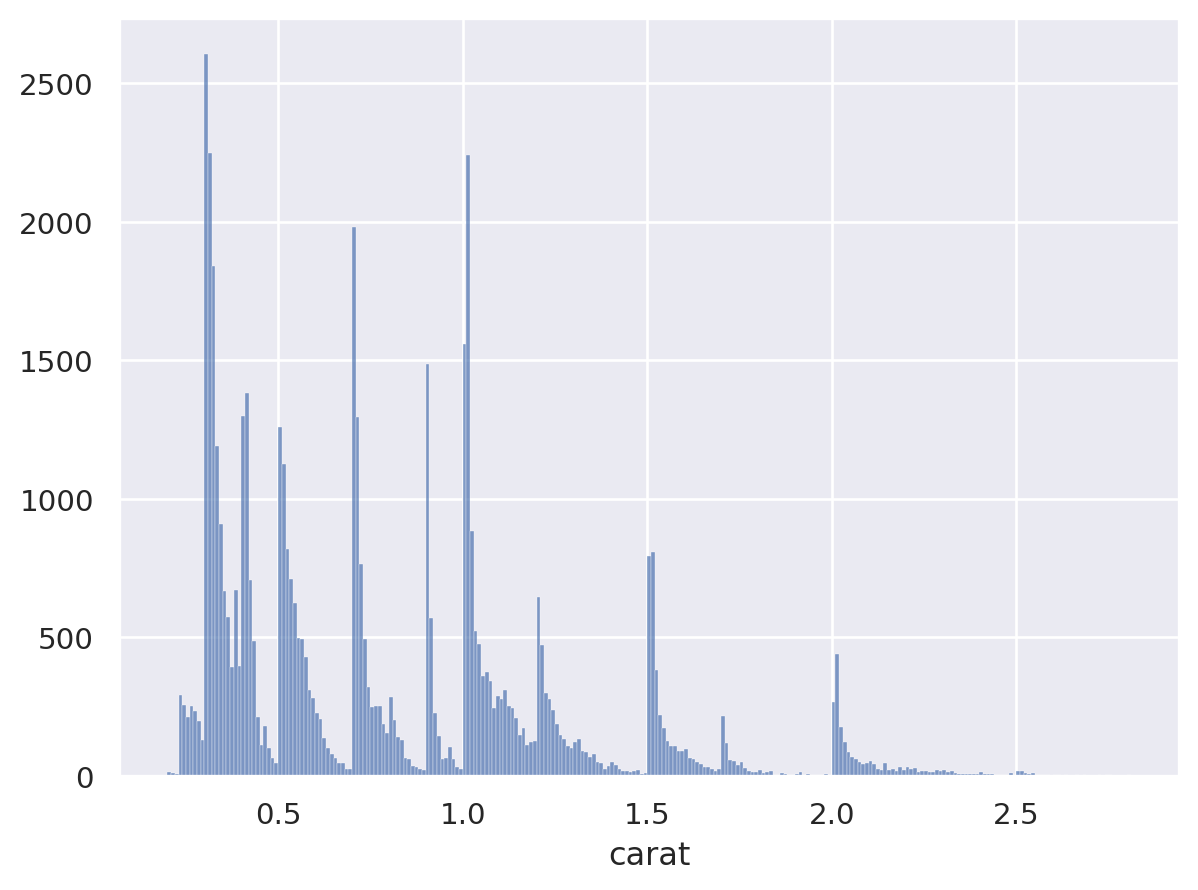

In [11]:
(so.Plot(smaller, "carat")
  .add(so.Bars(), so.Hist(binwidth=0.01, binrange=(-0.09, 3)))
)

In [12]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/faithful/faithful.csv"
faithful = pd.read_csv(url)

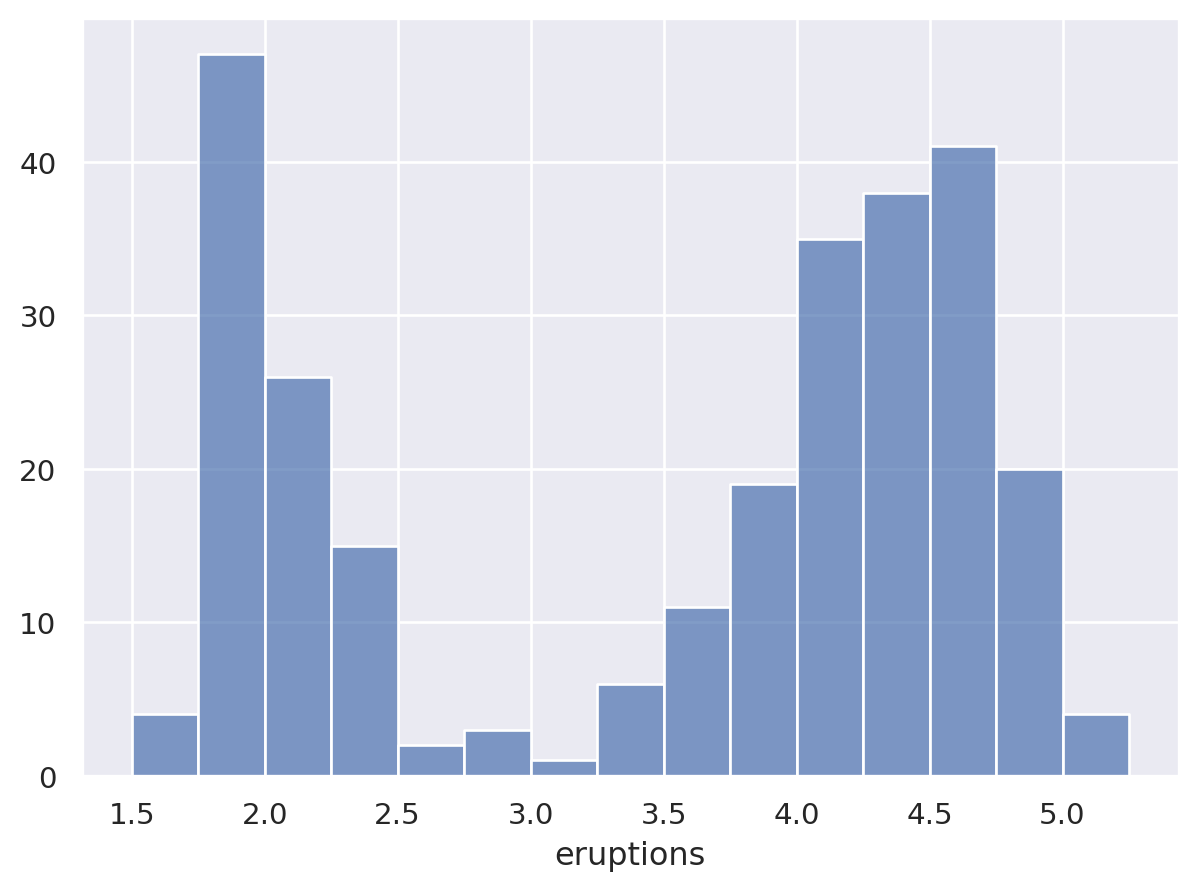

In [13]:
(so.Plot(faithful, "eruptions")
  .add(so.Bars(), so.Hist(binwidth=0.25, binrange=(0, 6)))
)

## 7.3.3 Unusual values
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#unusual-values

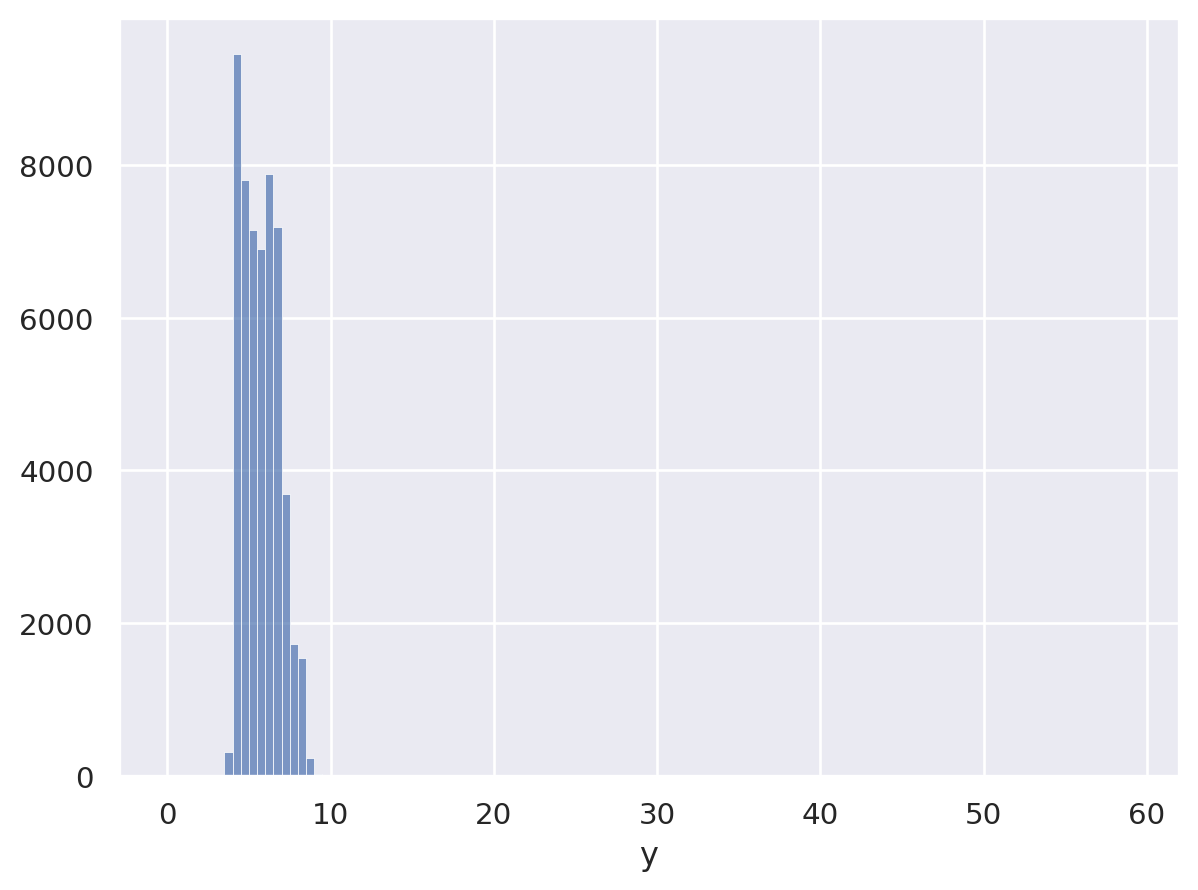

In [14]:
(so.Plot(diamonds, "y")
  .add(so.Bars(), so.Hist(binwidth=0.5, binrange=(0, 60)))
)

Use [`Plot.limit()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.limit.html) to clip the y-axis at 50 to see the smaller bars (less frequent values)

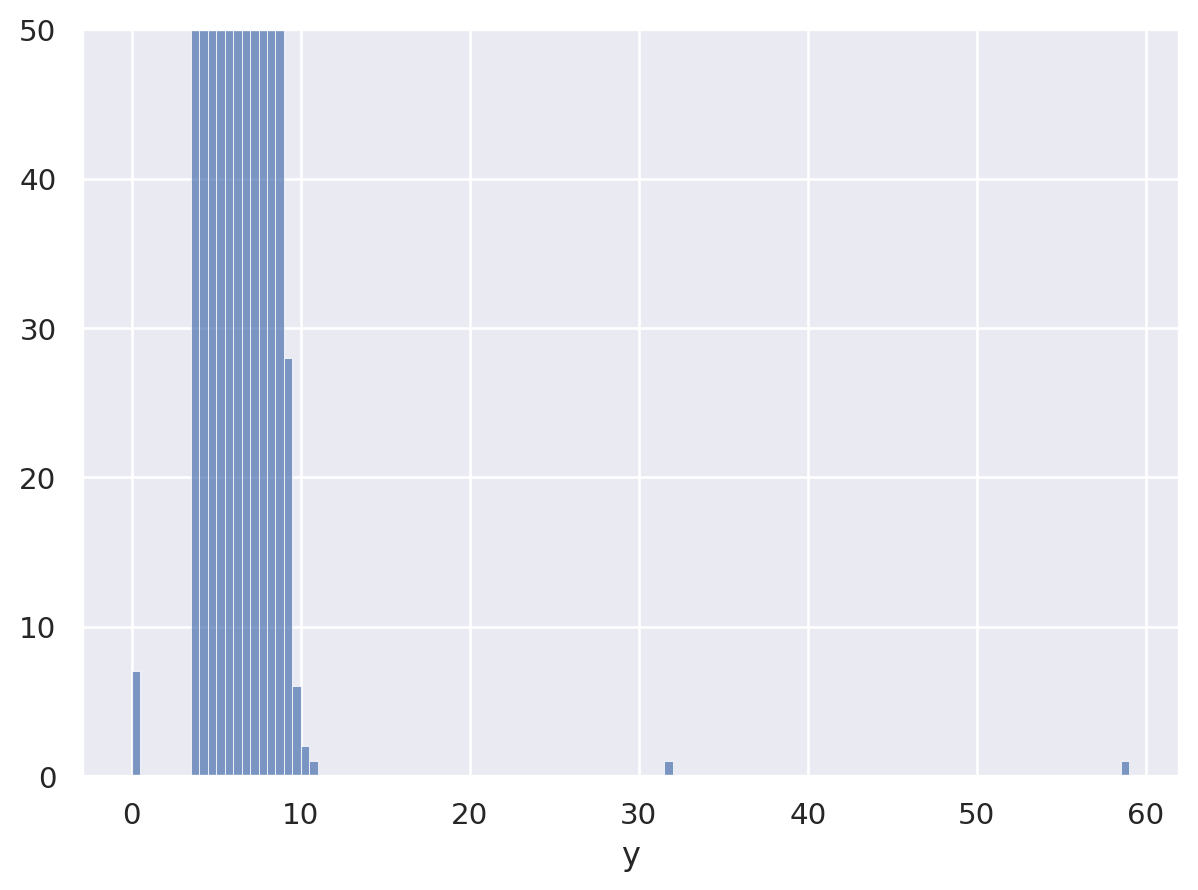

In [15]:
(so.Plot(diamonds, "y")
  .add(so.Bars(), so.Hist(binwidth=0.5, binrange=(0, 60)))
  .limit(y=(0,50))
)

# 7.4 Missing values
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#missing-values-2

Replace unusual values with `np.nan`

In [16]:
diamonds2 = diamonds.assign(
        y = lambda x: np.where((x.y < 3) | (x.y > 20), np.nan, x.y)
        )

NaN values automatically excluded by Seaborn

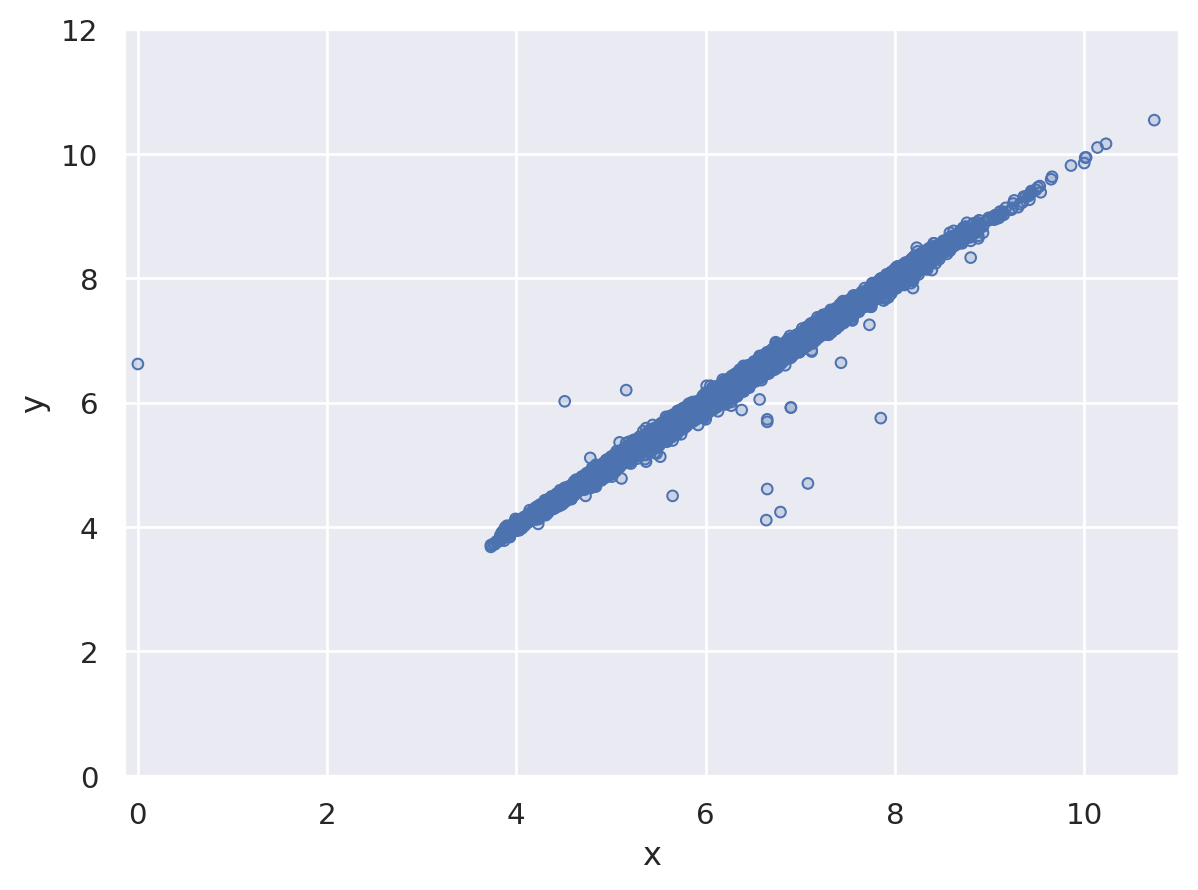

In [17]:
(
    so.Plot(diamonds2,
            x="x", y="y")
    .add(so.Dots())
    .limit(x=(-0.15,11), y=(0,12))   # set axes ranges
)

***It's not clear that Seaborn objects has an equivalent setting to `invalid=None` in Altair.***  I'll leave it as an exercise to you to turn all the NaN values to 0.

In [18]:
flights_url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/flights/flights.csv"

flights = pd.read_csv(flights_url)
flights['time_hour'] = pd.to_datetime(flights.time_hour, format = "%Y-%m-%d %H:%M:%S")

pdat = flights.assign(
  cancelled = lambda x: pd.isna(x.dep_time),
  sched_hour = lambda x: x.sched_dep_time // 100,
  sched_minute = lambda x: x.sched_dep_time % 100,
  sched_dep_time = lambda x: x.sched_hour + x.sched_minute / 60
  )

***I dislike the overlapping bars -- it's too easy to get confused with stacked bars.*** Here, I'm using `so.Area()` instead.

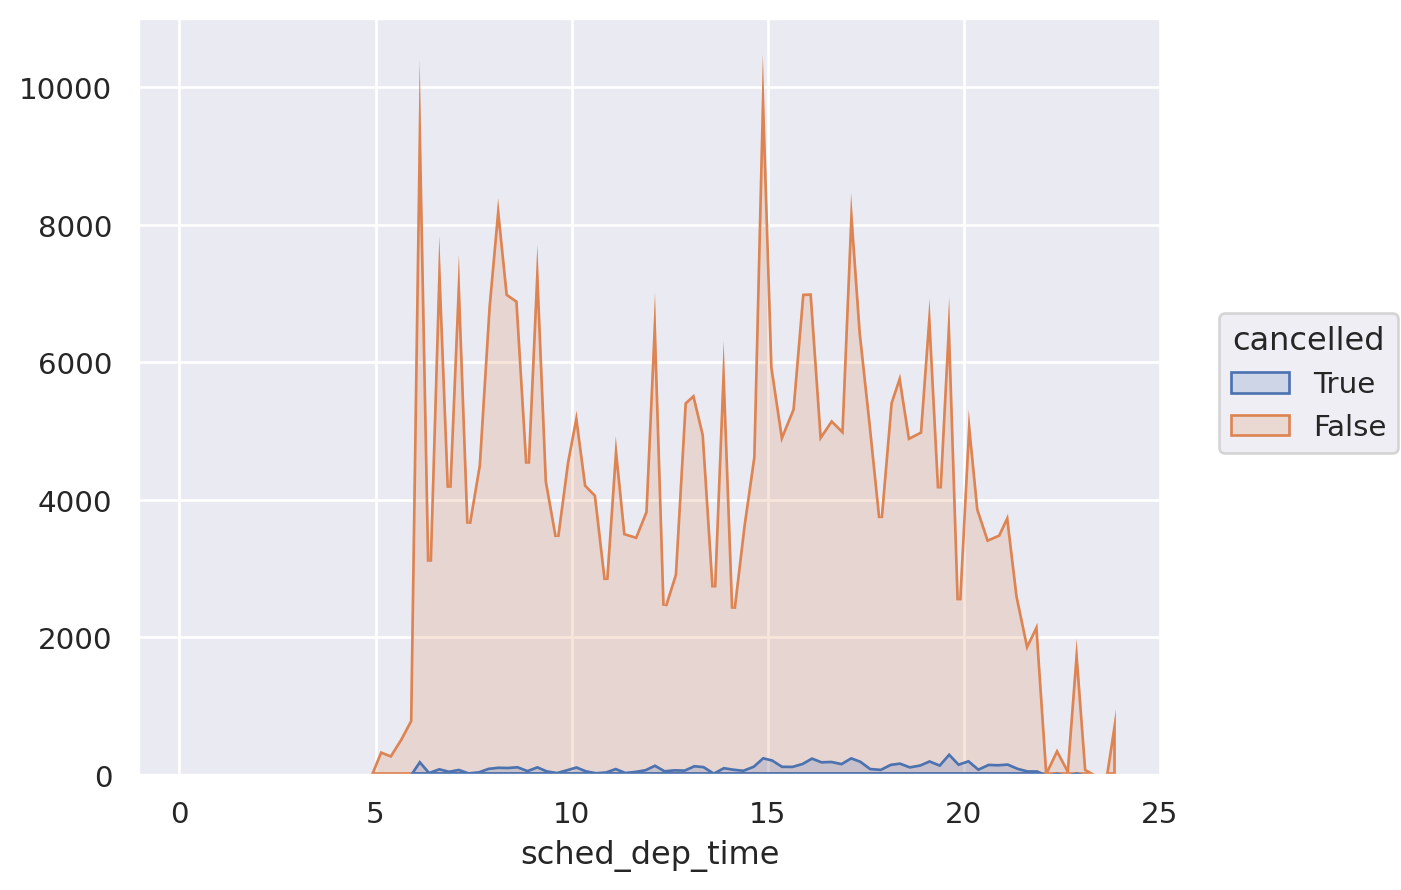

In [19]:
(
    so.Plot(pdat, "sched_dep_time", color="cancelled")
    .add(so.Area(), so.Hist(binwidth=0.25, binrange=(0,24)))
)

# 7.5 Covariation
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#covariation

## 7.5.1 A categorical and continuous variable
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#cat-cont

This looks different than the Altair version because `cut` here is sorted differently. *Not clear why the sorting in legend is different than the sorting of the stacked bars.*

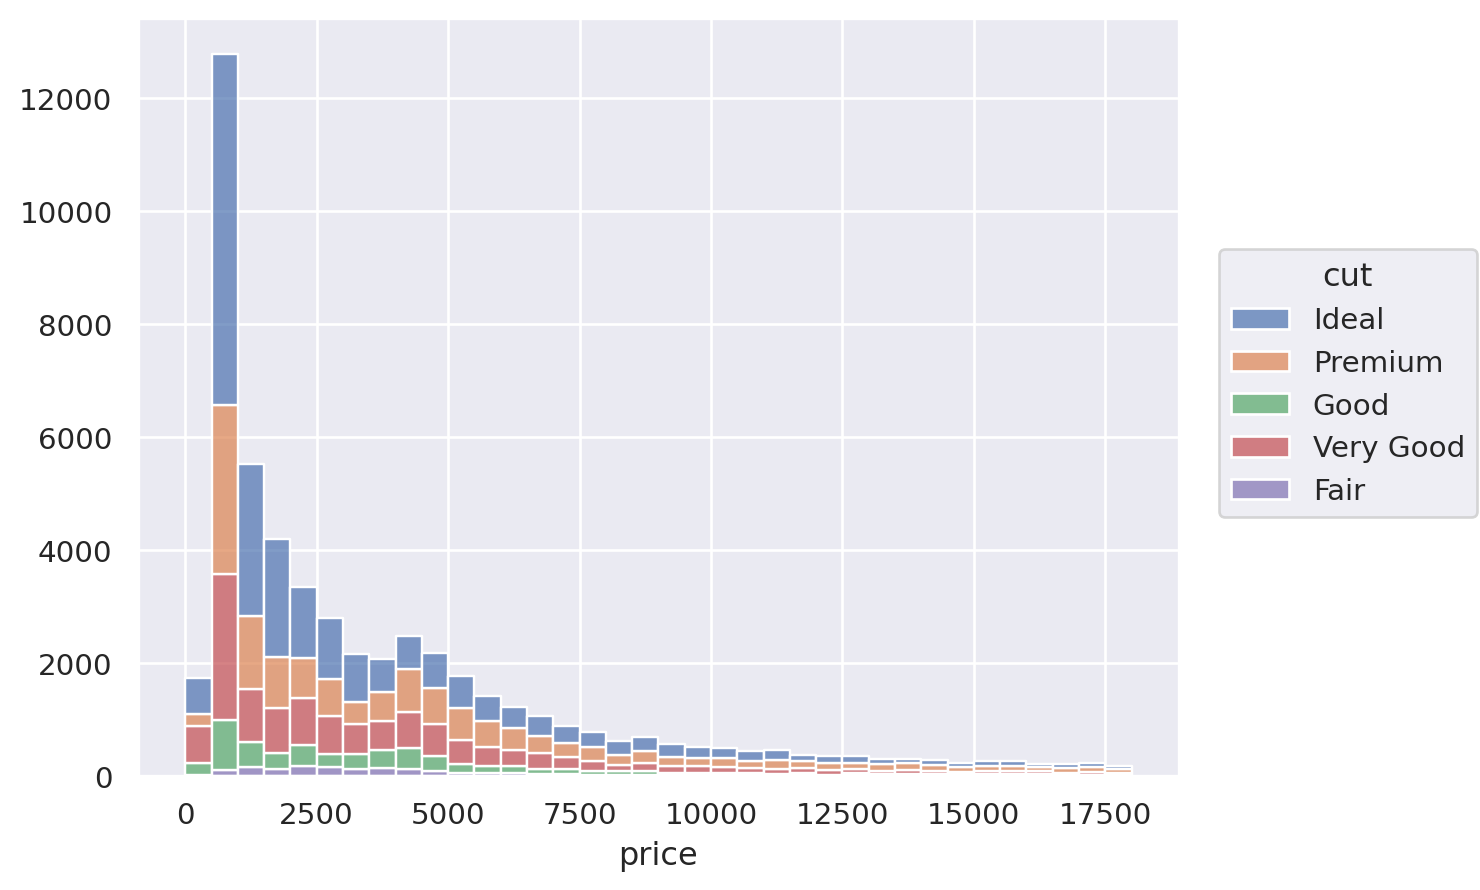

In [20]:
(
    so.Plot(diamonds, "price", color="cut")
    .add(so.Bars(), so.Hist(binwidth=500, binrange=(0,18000)), so.Stack())
)

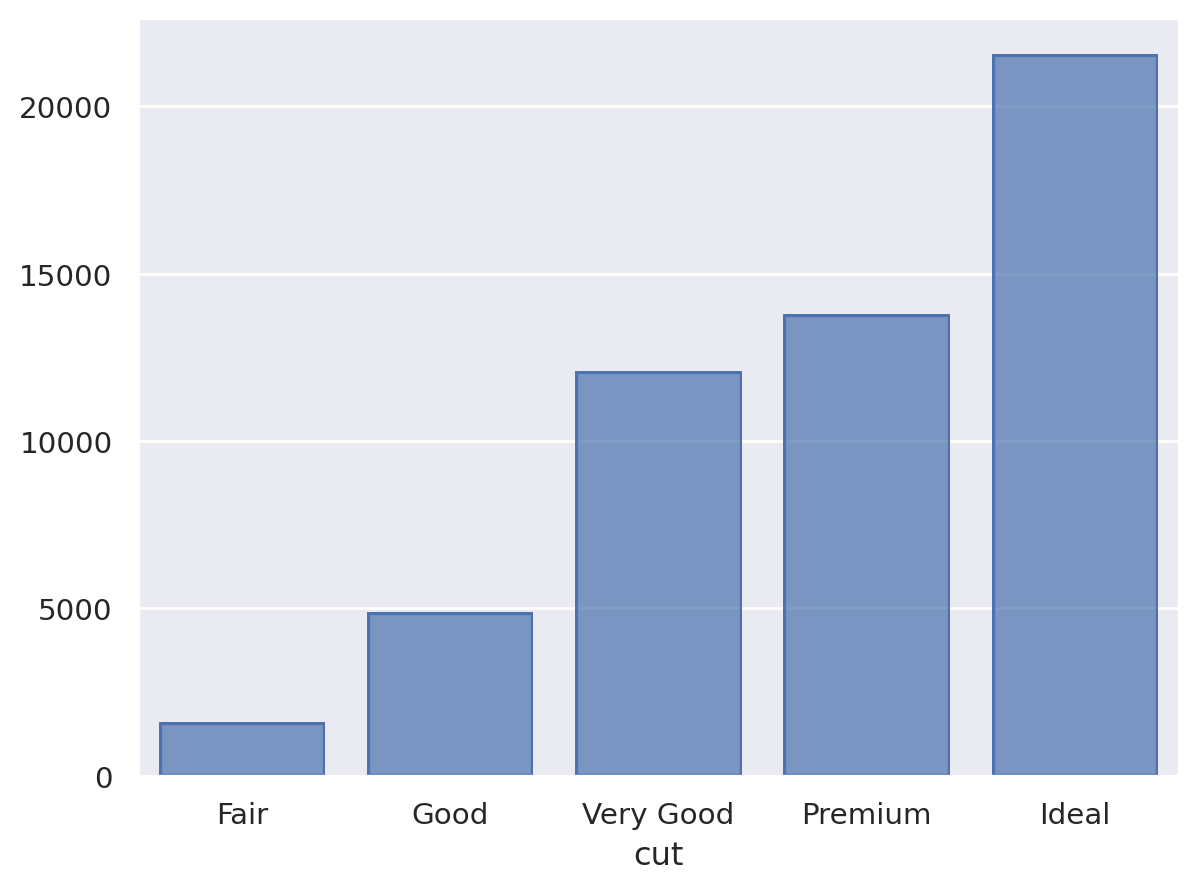

In [21]:
(so.Plot(diamonds, 'cut')
  .add(so.Bar(), so.Hist())
)

The closest I could find to what this is trying to do is the KDE plot in Seaborn.  The y-axis scale is different, but the shapes are similar.

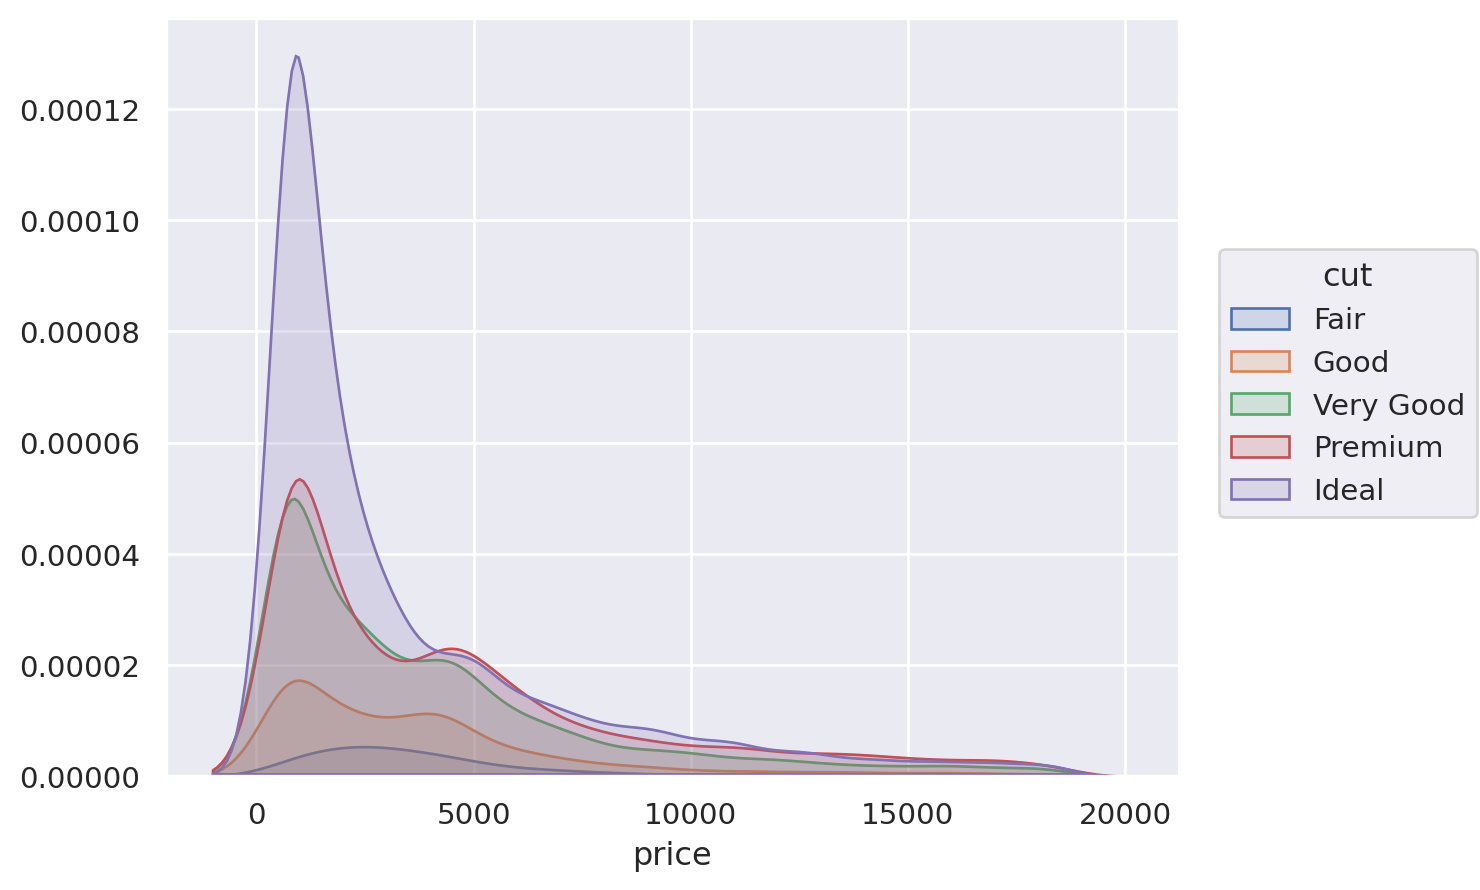

In [26]:
(so.Plot(diamonds, 'price')
  .add(so.Area(), so.KDE(), color="cut")
)

There's no boxplot in Seaborn Objects, so this is regular Seaborn.

<Axes: xlabel='cut', ylabel='price'>

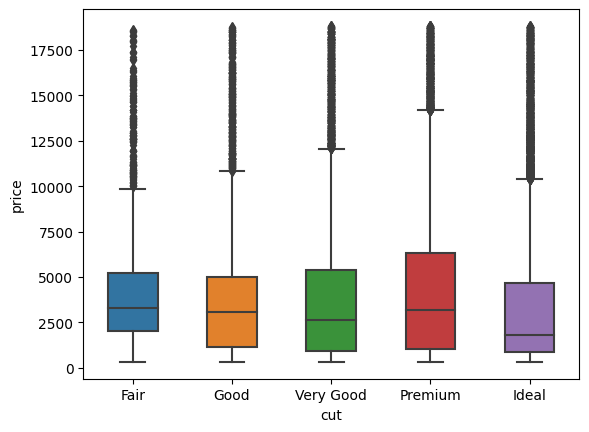

In [28]:
sns.boxplot(data=diamonds, x='cut', y='price', width=0.5)

In [29]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/mpg/mpg.csv"
mpg = pd.read_csv(url)

<Axes: xlabel='class', ylabel='hwy'>

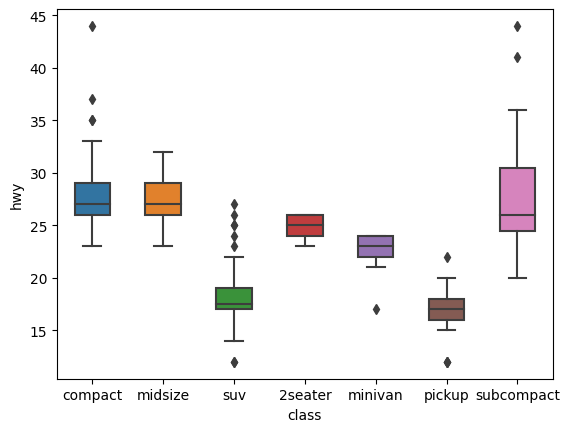

In [30]:
sns.boxplot(data=mpg, x='class', y='hwy', width=0.5)

In [154]:
index = list(mpg.groupby('class').median(numeric_only=True).sort_values('hwy').index)

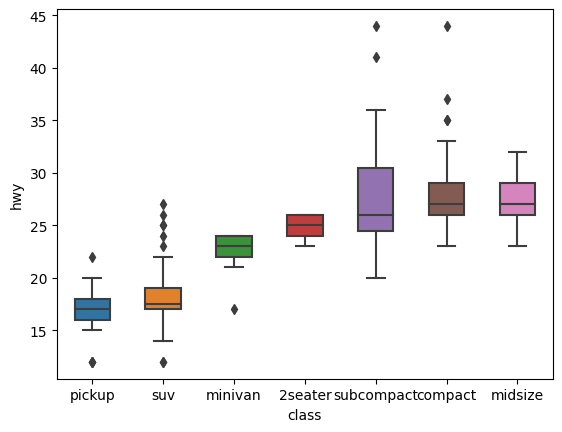

In [158]:
ax = sns.boxplot(data=mpg, x='class', y='hwy', order=index, width=0.5)
plt.show()

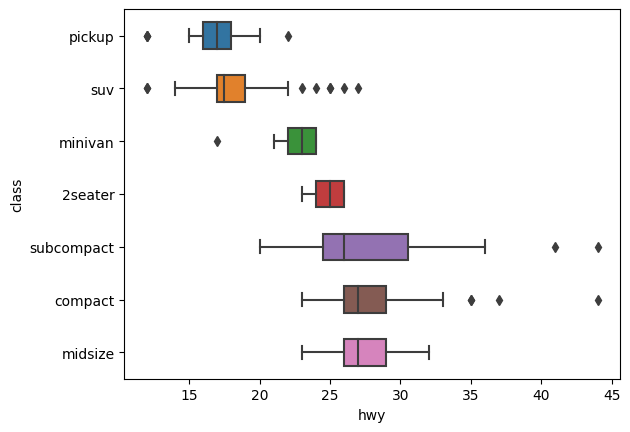

In [77]:
ax = sns.boxplot(data=mpg, y='class', x='hwy', order=index, width=0.5)
plt.show()

## 7.5.2 Two categorical variables
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#two-categorical-variables

In [44]:
chart_dat2 = (diamonds
    .groupby(['color', 'cut'])
    .size()
    .reset_index(name = 'n'))

In [45]:
chart_dat2.head()

,color,cut,n
0,D,Fair,163
1,D,Good,662
2,D,Very Good,1513
3,D,Premium,1603
4,D,Ideal,2834


Seaborn Objects doesn't have a heatmap either.  For `sns.heatmap()`, the data needs to be in a different format, so we need to do a pivot on this table.

In [91]:
chart_dat2_pivot = chart_dat2.pivot(index="cut", columns="color", values="n")
chart_dat2_pivot.head()

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Very Good,1513,2400,2164,2299,1824,1204,678
Premium,1603,2337,2331,2924,2360,1428,808
Ideal,2834,3903,3826,4884,3115,2093,896


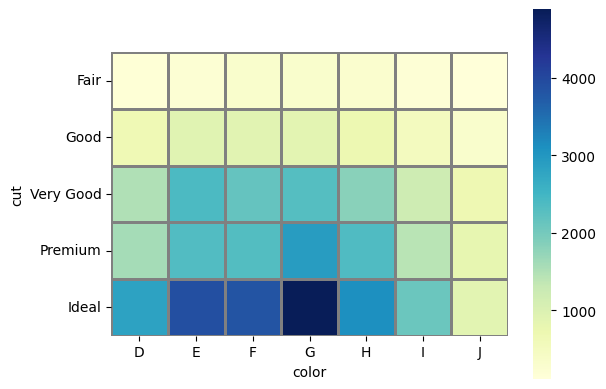

In [90]:
ax = sns.heatmap(chart_dat2_pivot, cmap="YlGnBu", square=True, linewidths=1, linecolor="grey")
plt.show()

## 7.5.3 Two continuous variables
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#two-continuous-variables

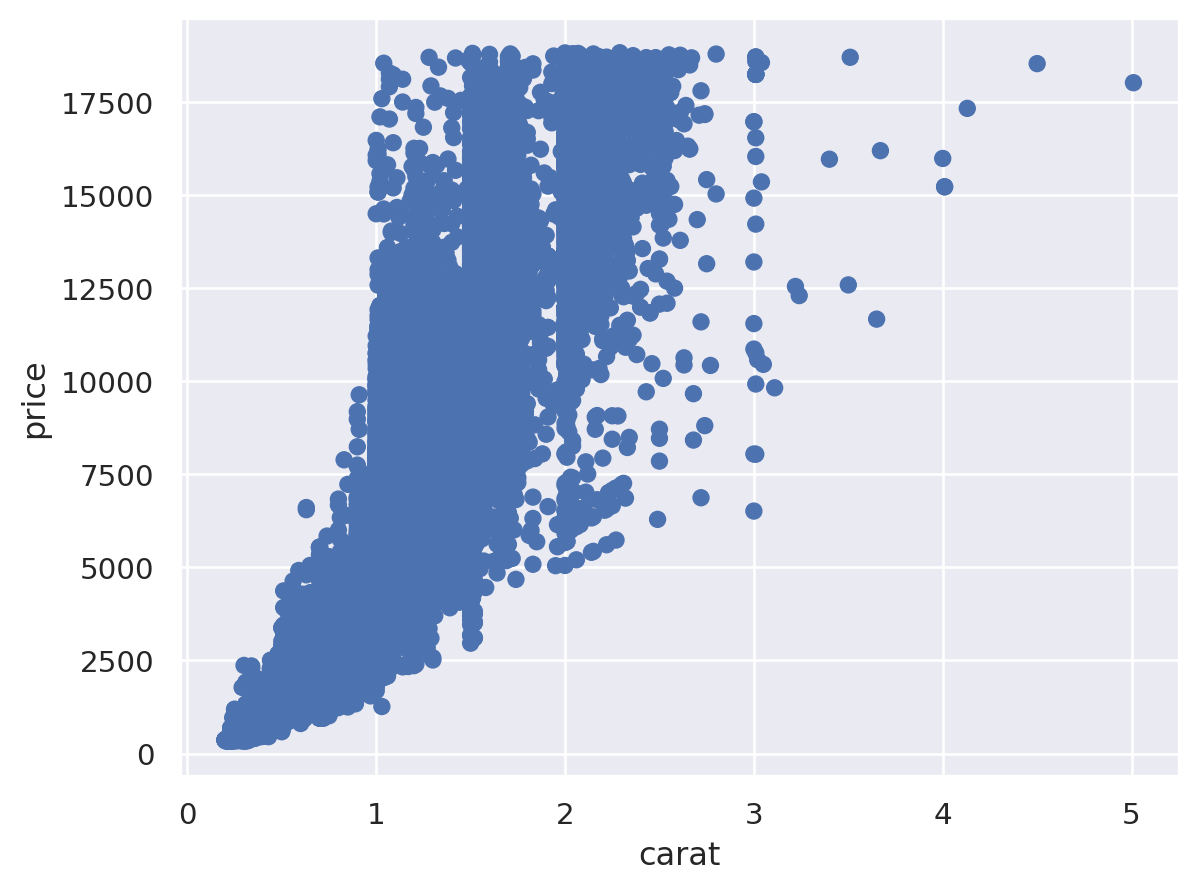

In [23]:
(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dot())
)

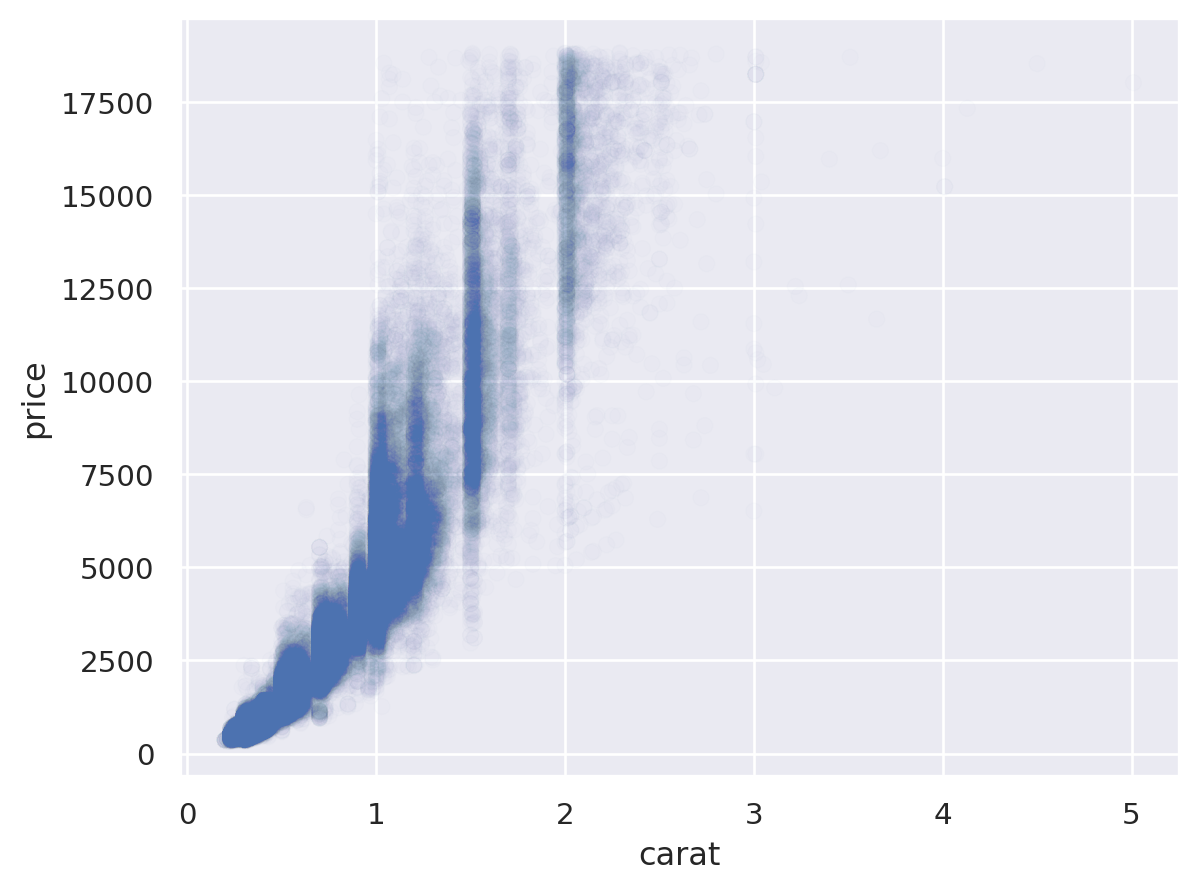

In [49]:
(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dot(alpha=0.01))
)

In [139]:
chart_dat3 = (smaller
    .assign(
      price_cut = lambda x: pd.cut(x.price,
                        bins = np.arange(0, 20000, step = 1000),
                        labels = np.arange(0, 19000, step = 1000)),
      carat_cut = lambda x: pd.cut(x.carat,
                        bins = np.arange(0, 5.4, step = .2),
                        labels = np.arange(0, 5.2, step = .2))
      ))

In [141]:
# MCW: need to convert _cut columns from "category" to "float", round to 1 decimal
chart_dat3 = chart_dat3.astype({'price_cut':'float', 'carat_cut':'float'})
chart_dat3['carat_cut'] = chart_dat3['carat_cut'].round(1)
chart_dat3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cut,carat_cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,0.2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.0,0.2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.0,0.2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0,0.2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0,0.2


In [142]:
chart_dat3_binned = (chart_dat3
    .groupby(['carat_cut', 'price_cut'])
    .size()
    .reset_index(name = 'n'))

chart_dat3_binned['n'].replace(to_replace = 0, value = np.nan, inplace = True)
chart_dat3_binned.head()

,carat_cut,price_cut,n
0,0.0,0.0,12
1,0.2,0.0,12711
2,0.2,1000.0,1662
3,0.2,2000.0,6
4,0.4,0.0,1788


Need to create a pivot table and sort `price_cut` in descending order.

In [150]:
chart_dat3_pivot = chart_dat3_binned.pivot(index="price_cut", columns="carat_cut", values="n")
chart_dat3_pivot = chart_dat3_pivot.sort_values(by=['price_cut'], ascending=False)

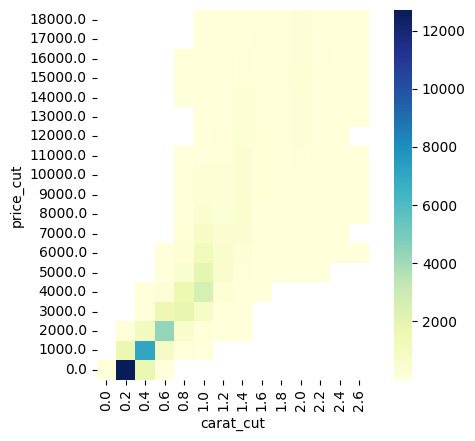

In [148]:
ax = sns.heatmap(chart_dat3_pivot, cmap="YlGnBu", square=True)
plt.show()

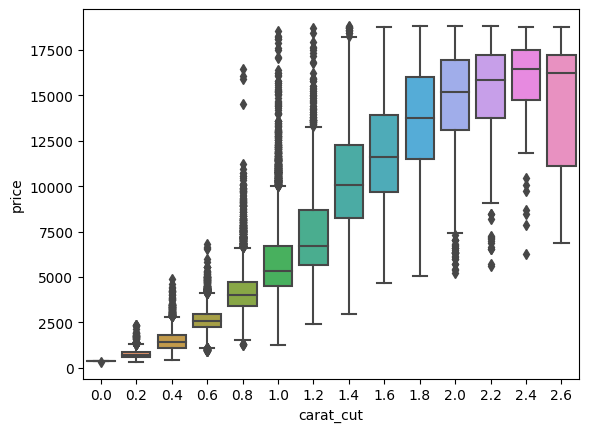

In [151]:
ax = sns.boxplot(data=chart_dat3, x='carat_cut', y='price')
plt.show()

In [58]:
chart_dat4 = smaller.assign(carat_cut = lambda x: pd.qcut(x.carat,10, labels = False))

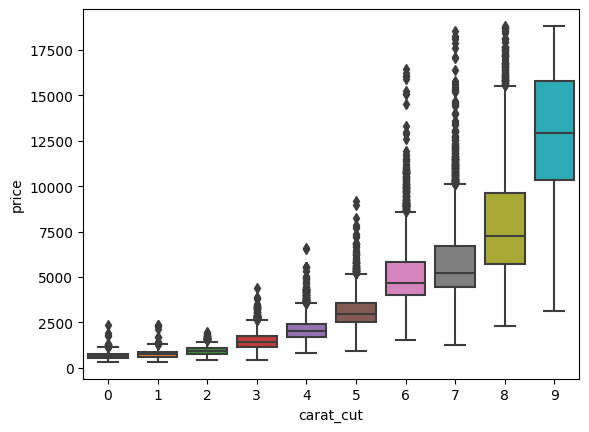

In [153]:
ax = sns.boxplot(data=chart_dat4, x='carat_cut', y='price')
plt.show()

# 7.6 Patterns and models
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#patterns-and-models

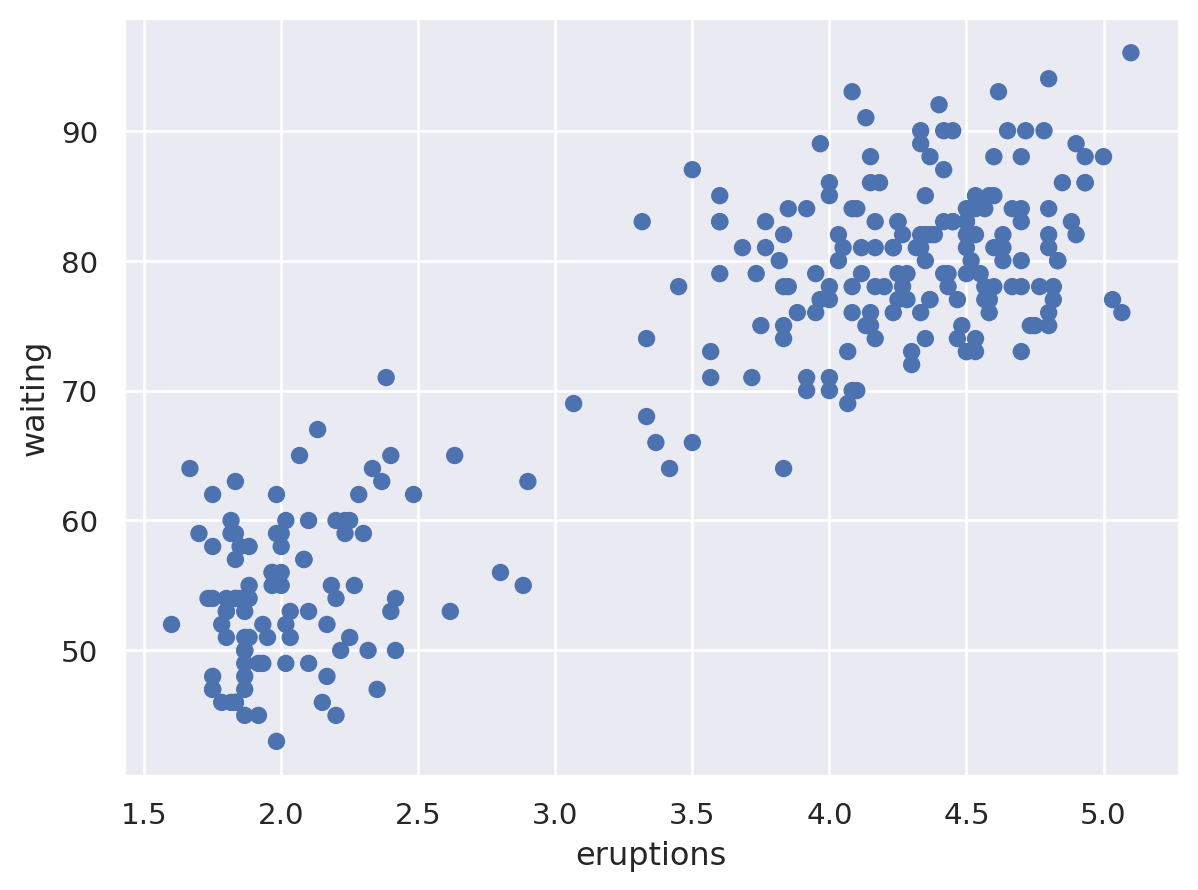

In [60]:
(so.Plot(faithful, x='eruptions', y='waiting')
  .add(so.Dot())
 )

In [61]:
import statsmodels.formula.api as smf
mod = smf.ols('np.log(price) ~ np.log(carat)', data = diamonds).fit()
diamonds2 = diamonds.assign(resid = np.exp(mod.resid))

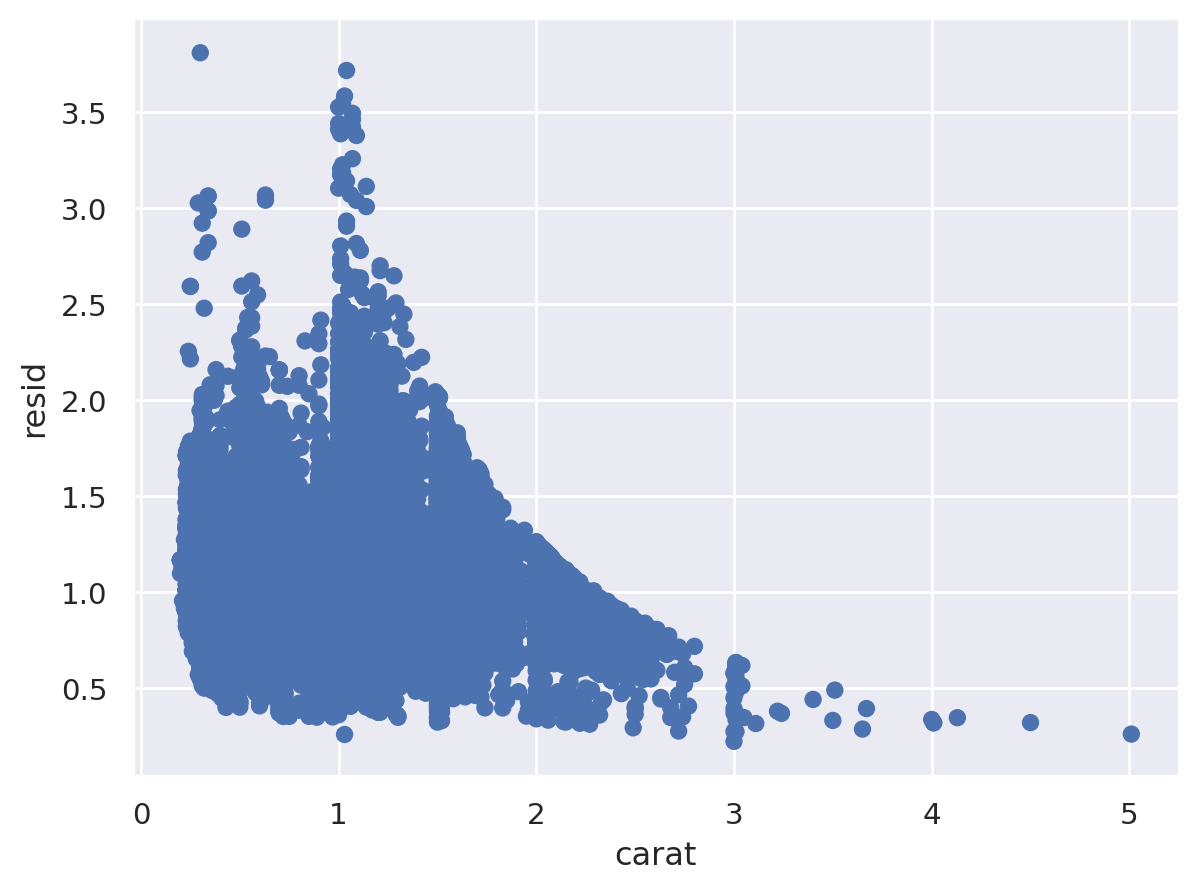

In [63]:
(so.Plot(diamonds2, x='carat', y='resid')
  .add(so.Dot())
 )

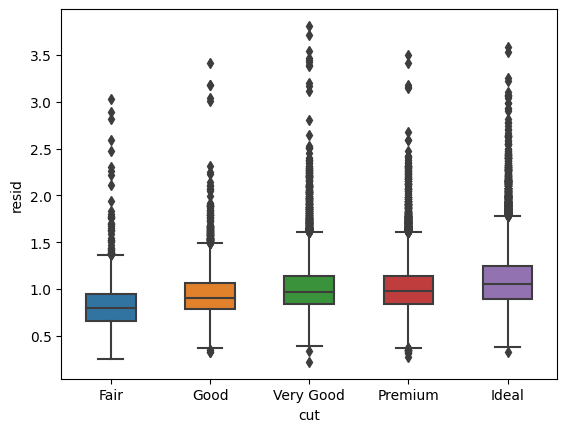

In [160]:
ax=sns.boxplot(data=diamonds2, x='cut', y='resid', width=0.5)
plt.show()